In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.display.mpl_style = 'default'
display(matplotlib.style.available)
plt.style.use('ggplot')

%matplotlib inline

['dark_background', 'fivethirtyeight', 'ggplot', 'bmh', 'grayscale']

In [2]:
results_f = "./evaluation/results.csv"
results = pd.read_csv(results_f, sep=",")

sph = results[results.Title.str.startswith("sphere")]
uni = results[results.Title.str.startswith("normal")]

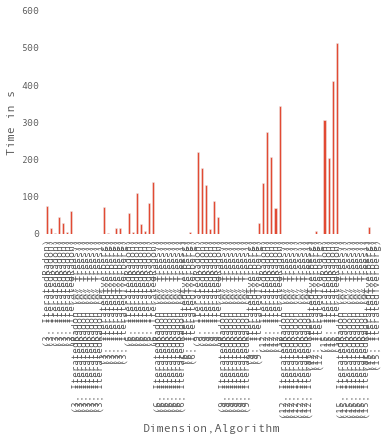

In [3]:
r3 = results.set_index(['Dimension', 'Algorithm']).sort_index()
ax = r3["mean time"].plot(kind="bar")
#ax.set_yscale("symlog")
ax.set_ylabel("Time in s")

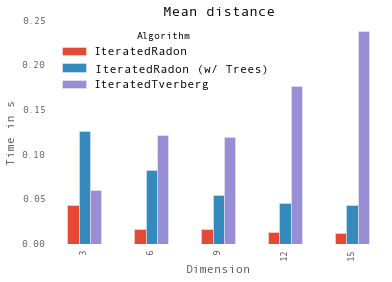

In [4]:
uni_p = uni.pivot_table(index='Dimension', columns='Algorithm', values=['mean distance', 'std distance'])
err_p = uni_p['std distance']

ax = uni_p['mean distance'].plot(kind='bar', title="Mean distance")
#ax = uni_p['mean distance'].plot(kind='bar', title="Mean distance", yerr=err_p.values)
# error bars are failing for some weird reasons in some cases
ax.set_ylabel("Time in s")

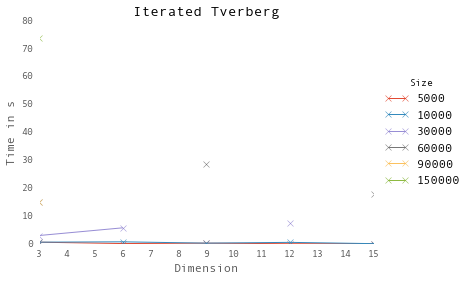

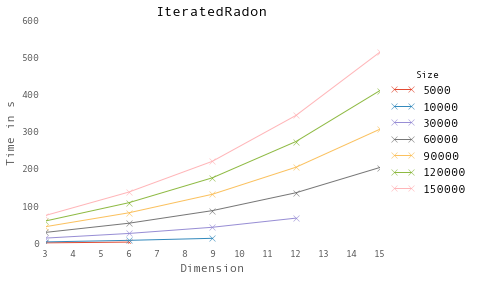

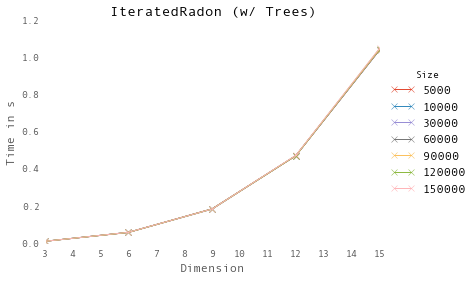

In [5]:
def plot_by_dim(data, name, title=None):
    title = title if title else name
    r = data[ data["Algorithm"] == name ]
    r_dim = r.pivot_table(index='Dimension', columns='Size', values='min time')
    ax = r_dim.plot(title=title, marker="x")
    ax.set_ylabel("Time in s")
    ax.xaxis.set_ticks(np.arange(3,r_dim.index.max() + 1))
    ax.legend(title="Size", loc="center left", bbox_to_anchor=(1, 0.5))
    
    
plot_by_dim(uni, "IteratedTverberg", "Iterated Tverberg")
plot_by_dim(uni, "IteratedRadon")
plot_by_dim(uni, "IteratedRadon (w/ Trees)")

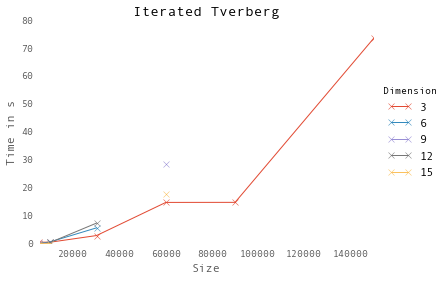

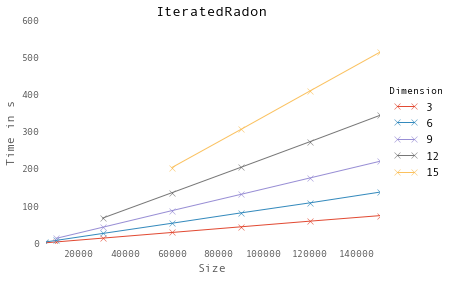

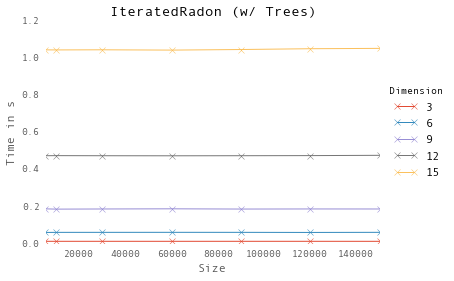

In [6]:
def plot_by_size(data, name, title=None):
    title = title if title else name
    r = data[ data["Algorithm"] == name ]
    r_size = r.pivot_table(index='Size', columns='Dimension', values='min time')
    ax = r_size.plot(title=title, marker="x")
    ax.set_ylabel("Time in s")
    ax.legend(title="Dimension", loc="center left", bbox_to_anchor=(1, 0.5))
    #ax.xaxis.set_ticks(np.arange(1,r_dim.index.max() + 1))

plot_by_size(uni,"IteratedTverberg", "Iterated Tverberg")
plot_by_size(uni, "IteratedRadon")
plot_by_size(uni, "IteratedRadon (w/ Trees)")

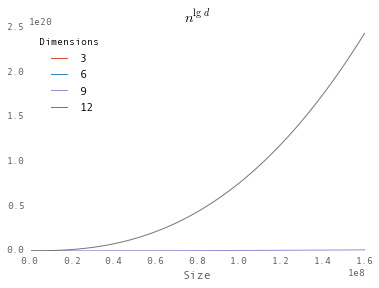

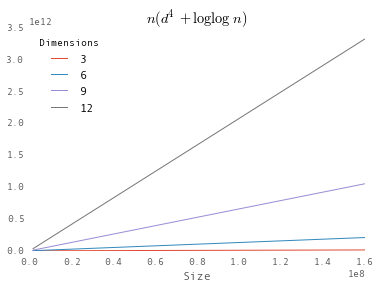

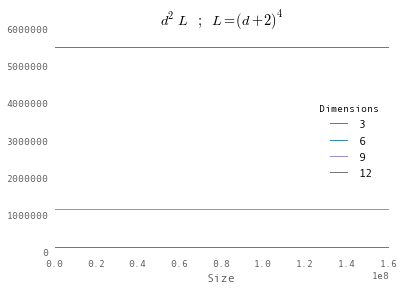

In [12]:
ticks_n = 100
dims = [3,6,9,12]
#x = np.linspace(0, 16000, ticks_n) # 100 linearly spaced numbers
ys = x.repeat(len(dims)).reshape(ticks_n, len(dims)).T
for i,d in enumerate(dims):
    ys[i] = np.power(ys[i], np.log(d))

df = pd.DataFrame(ys.T, index=pd.Index(x, name="Size"), columns=pd.Index(dims, name="Dimensions"))
df.plot(title=r"$n^{\lg \ d}$")
    
#fig, ax = plt.subplots(title=)
#for y in ys:
#    ax.plot(x,y)


ys = x.repeat(len(dims)).reshape(ticks_n, len(dims)).T
for i,d in enumerate(dims):
    
    ys[i] = (ys[i] * (d ** 4 + np.log(np.log(ys[i]))))

df = pd.DataFrame(ys.T, index=pd.Index(x, name="Size"), columns=pd.Index(dims, name="Dimensions"))
df.plot(title=r"$n(d^4 + \log \log\ n)$")


ys = x.repeat(len(dims)).reshape(ticks_n, len(dims)).T
for i,d in enumerate(dims):
    L = (d + 2) ** 4
    ys[i][:] = (d ** 2) * L

df = pd.DataFrame(ys.T, index=pd.Index(x, name="Size"), columns=pd.Index(dims, name="Dimensions"))
df.plot(title=r"$d^2 L \;;\; L=(d+2)^4 $")